## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## Importing Dataframes

In [2]:
path = r"/Users/katalysenko/Documents/Instacart Basket Analysis"

In [3]:
ords_prods_customers_merged = pd.read_pickle(r"/Users/katalysenko/Documents/Instacart Basket Analysis/02 Data/Prepared Data/orders_products_customers_merged.pkl")

## Data Security and Privacy

In [4]:
ords_prods_customers_merged.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,order_frequency_flag,first_name,surname,gender,state,age,date_joined,num_of_dependants,fam_status,income
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,prior,3,3,12,21.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,prior,5,4,15,28.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [5]:
ords_prods_customers_merged.shape

(32434212, 34)

In [6]:
# Dropping "first_name" and "surname" column. We can see that in our case, we have particularly sensitive data in the form of the "first_name" and "surname" columns, so we get rid of them before we start our analysis.

ords_prods_customers_merged = ords_prods_customers_merged.drop(['first_name', 'surname'], axis=1)

## Create a “Region” column based on the “State” column from the customers data set.

In [7]:
results_region = []

for value in ords_prods_customers_merged["state"]:
  if value == 'Maine' or value == 'New Hampshire' or value == 'Vermont' or value == 'Massachusetts' or value == 'Rhode Island' or value == 'Connecticut' or value == 'New York' or value == 'Pennsylvania' or value == 'New Jersey':
    results_region.append("Northeast")
  elif value == 'Wisconsin' or value == 'Michigan' or value == 'Illinois' or value == 'Indiana' or value == 'Ohio' or value == 'North Dakota' or value == 'South Dakota' or value == 'Nebraska' or value == 'Kansas' or value == 'Minnesota' or value == 'Iowa' or value == 'Missouri':
    results_region.append("Midwest")
  elif value == 'Delaware' or value == 'Maryland' or value == 'District of Colombia' or value == 'Virginia' or value == 'West Virginia' or value == 'North Carolina' or value == 'South Carolina' or value == 'Georgia' or value == 'Florida' or value == 'Kentucky' or value == 'Tennessee' or value == 'Mississippi' or value == 'Alabama' or value == 'Oklahoma' or value == 'Texas' or value == 'Arkansas' or value == 'Lousiana':
    results_region.append("South")
  else:
    results_region.append("West")

In [8]:
ords_prods_customers_merged['region'] = results_region

In [9]:
print(ords_prods_customers_merged[['state', 'region']])

              state region
0           Alabama  South
1           Alabama  South
2           Alabama  South
3           Alabama  South
4           Alabama  South
...             ...    ...
32434207     Hawaii   West
32434208  Tennessee  South
32434209  Tennessee  South
32434210  Tennessee  South
32434211  Tennessee  South

[32434212 rows x 2 columns]


##  Determine if there is a difference in spending habits between different regions of the United States. Create a crosstabulation table.

In [10]:
crosstab = pd.crosstab(ords_prods_customers_merged['spending_flag'], ords_prods_customers_merged['region'], dropna = False)

In [11]:
crosstab.to_clipboard()

In [12]:
crosstab

region,Midwest,Northeast,South,West
spending_flag,,,,
High spender,7596096,5722788,9540228,9543523
Low spender,7714,5559,8915,9389


## Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data.

In [13]:
# Create an exlusion flag

ords_prods_customers_merged.loc[ords_prods_customers_merged['max_order']>= 5, 'customer_activity'] = 'High-activity customer'

In [14]:
ords_prods_customers_merged.loc[ords_prods_customers_merged['max_order']< 5, 'customer_activity'] = 'Low-activity customer'

In [15]:
# Check the results

ords_prods_customers_merged['customer_activity'].value_counts (dropna = False)

customer_activity
High-activity customer    30992664
Low-activity customer      1441548
Name: count, dtype: int64

In [16]:
# Creating a subset

customer_low_activity = ords_prods_customers_merged[ords_prods_customers_merged['customer_activity'] =='Low-activity customer']

In [17]:
customer_low_activity.shape

(1441548, 34)

In [18]:
customer_high_activity = ords_prods_customers_merged[ords_prods_customers_merged['customer_activity'] =='High-activity customer']

In [19]:
customer_high_activity.shape

(30992664, 34)

In [20]:
# Export the sample/subset with low activity customers as a pickle. 

customer_low_activity.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'customer_low_activity.pkl'))

In [21]:
# Export the sample/subset with high activity customers as a pickle. 

customer_high_activity.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'customer_high_activity.pkl'))

## Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. 

In [22]:
# Creating age groups

customer_high_activity['age'].describe()

count    3.099266e+07
mean     4.946793e+01
std      1.848520e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

In [23]:
bins = [18, 25, 35, 45, 55, 65, 81]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66-81']

customer_high_activity['age_group'] = pd.cut(customer_high_activity['age'], bins=bins, labels=labels, include_lowest=True)

/var/folders/p4/8yql05j55jlgk_8dqfyzrk2r0000gn/T/ipykernel_55515/1362863365.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_high_activity['age_group'] = pd.cut(customer_high_activity['age'], bins=bins, labels=labels, include_lowest=True)


In [24]:
# Check the results

customer_high_activity['age_group'].value_counts(dropna = False)

age_group
66-81    7737619
46-55    4893849
26-35    4878613
36-45    4832400
56-65    4782017
18-25    3868166
Name: count, dtype: int64

In [25]:
# Create income groups

customer_high_activity['income'].describe()

count    3.099266e+07
mean     9.967322e+04
std      4.313928e+04
min      2.590300e+04
25%      6.728900e+04
50%      9.676500e+04
75%      1.281010e+05
max      5.939010e+05
Name: income, dtype: float64

In [26]:
income_bins = [0, 67292, 128102, 593901]
income_labels = ['Low Income', 'Middle Income', 'High Income']

customer_high_activity['income_group'] = pd.cut(customer_high_activity['income'], bins=income_bins, labels=income_labels, include_lowest=True)

/var/folders/p4/8yql05j55jlgk_8dqfyzrk2r0000gn/T/ipykernel_55515/2258397227.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_high_activity['income_group'] = pd.cut(customer_high_activity['income'], bins=income_bins, labels=income_labels, include_lowest=True)


In [27]:
# Check the results

customer_high_activity['income_group'].value_counts(dropna=False)

income_group
Middle Income    15495983
Low Income        7748855
High Income       7747826
Name: count, dtype: int64

## Grouping Customer Profile

In [28]:
customer_high_activity['num_of_dependants'].value_counts()

num_of_dependants
3    7779452
0    7747032
2    7740199
1    7725981
Name: count, dtype: int64

In [29]:
customer_high_activity['fam_status'].value_counts(dropna = False)

fam_status
married                             21763021
single                               5099271
divorced/widowed                     2647761
living with parents and siblings     1482611
Name: count, dtype: int64

In [30]:
#Customer profiles

customer_high_activity.loc[(customer_high_activity['fam_status'] != 'married') & (customer_high_activity['num_of_dependants'] > 0), 'customer_profile'] = 'Single Parent'
customer_high_activity.loc[(customer_high_activity['fam_status'] != 'married') & (customer_high_activity['gender'] == 'Female') & (customer_high_activity['num_of_dependants'] == 0), 'customer_profile'] = 'Single Female w/o Children'
customer_high_activity.loc[(customer_high_activity['fam_status'] != 'married') & (customer_high_activity['gender'] == 'Male') & (customer_high_activity['num_of_dependants'] == 0), 'customer_profile'] = 'Single Male w/o Children'
customer_high_activity.loc[(customer_high_activity['age'] < 30) & (customer_high_activity['fam_status'] == 'married') & (customer_high_activity['num_of_dependants'] > 0), 'customer_profile'] = 'Married Young Parent'
customer_high_activity.loc[(customer_high_activity['age'] >= 30) & (customer_high_activity['fam_status'] == 'married') & (customer_high_activity['num_of_dependants'] > 0), 'customer_profile'] = 'Married Older Parent'
customer_high_activity.loc[(customer_high_activity['fam_status'] == 'married') & (customer_high_activity['num_of_dependants'] == 0), 'customer_profile'] = 'Married Young Parent'

/var/folders/p4/8yql05j55jlgk_8dqfyzrk2r0000gn/T/ipykernel_55515/3048373938.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_high_activity.loc[(customer_high_activity['fam_status'] != 'married') & (customer_high_activity['num_of_dependants'] > 0), 'customer_profile'] = 'Single Parent'


In [31]:
#Check the results

customer_high_activity['customer_profile'].value_counts(dropna=False)

customer_profile
Married Older Parent          18871671
Single Male w/o Children       3884900
Single Female w/o Children     3862132
Married Young Parent           2891350
Single Parent                  1482611
Name: count, dtype: int64

In [32]:
customer_high_activity.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,age,date_joined,num_of_dependants,fam_status,income,region,customer_activity,age_group,income_group,customer_profile
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,31,2/17/2019,3,married,40423,South,High-activity customer,26-35,Low Income,Married Older Parent
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,31,2/17/2019,3,married,40423,South,High-activity customer,26-35,Low Income,Married Older Parent
2,473747,1,prior,3,3,12,21.0,196,1,1,...,31,2/17/2019,3,married,40423,South,High-activity customer,26-35,Low Income,Married Older Parent
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,31,2/17/2019,3,married,40423,South,High-activity customer,26-35,Low Income,Married Older Parent
4,431534,1,prior,5,4,15,28.0,196,1,1,...,31,2/17/2019,3,married,40423,South,High-activity customer,26-35,Low Income,Married Older Parent


## Create an appropriate visualization to show the distribution of profiles.

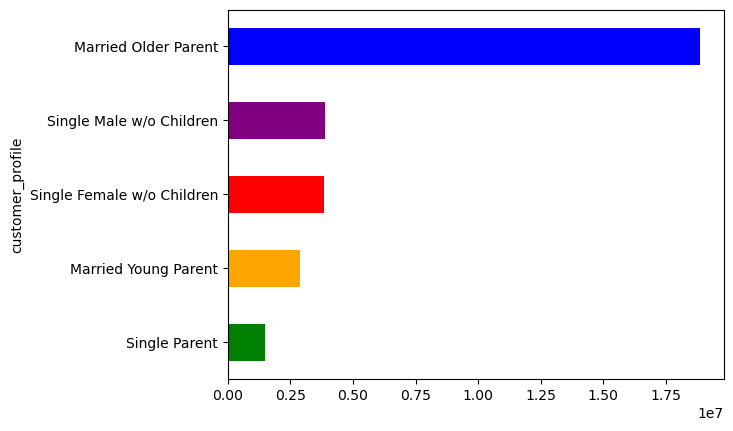

In [33]:
bar = customer_high_activity['customer_profile'].value_counts().sort_values(ascending=True).plot.barh(color =['green','orange', 'red','purple','blue'])

In [34]:
# Export visual

bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'customer_profile.png'))

## Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [35]:
customer_profile_agg = customer_high_activity.groupby('customer_profile').agg({'order_id': 'count','prices': ['min', 'mean', 'max']})

In [36]:
customer_profile_agg

order_id prices                    
                               count    min       mean      max
customer_profile                                               
Married Older Parent        18871671    1.0  11.832916  99999.0
Married Young Parent         2891350    1.0  12.678965  99999.0
Single Female w/o Children   3862132    1.0  11.665994  99999.0
Single Male w/o Children     3884900    1.0  12.538412  99999.0
Single Parent                1482611    1.0  10.892382  99999.0

## Compare customer profiles across regions and departments. 

In [37]:
customer_region_profile = pd.crosstab(customer_high_activity['customer_profile'],customer_high_activity['region'], dropna = False)

In [38]:
customer_region_profile

region,Midwest,Northeast,South,West
customer_profile,,,,
Married Older Parent,4416369,3353848,5540768,5560686
Married Young Parent,675159,503609,854380,858202
Single Female w/o Children,906419,664320,1172973,1118420
Single Male w/o Children,918068,691508,1118759,1156565
Single Parent,351692,256783,438693,435443


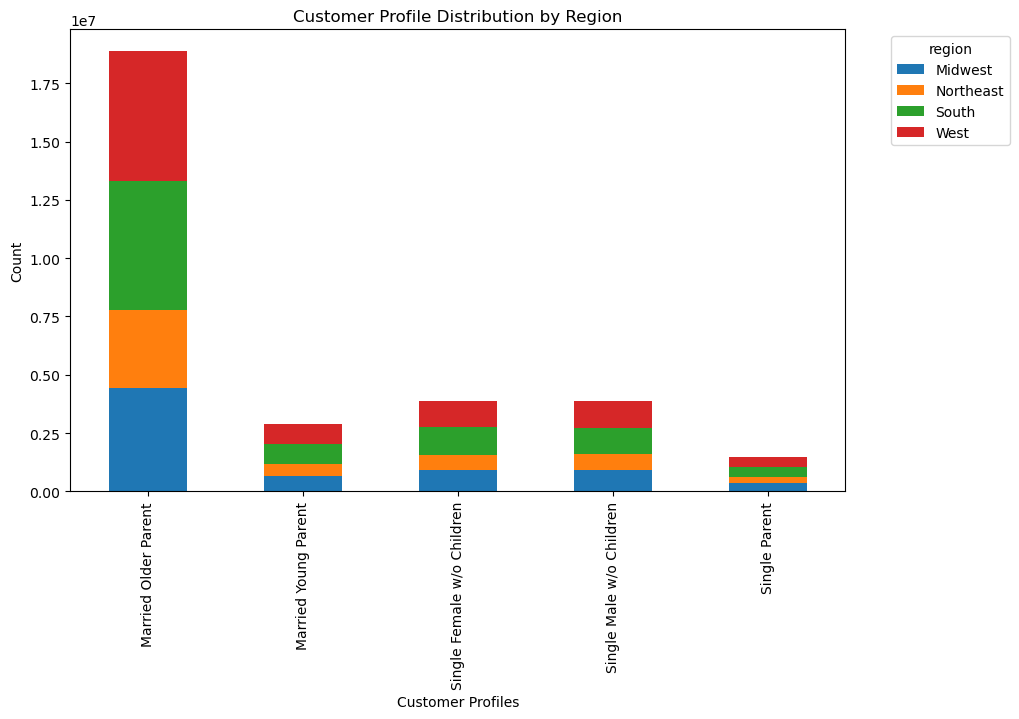

In [39]:
customer_region_profile_bar_stacked = customer_region_profile.plot.bar(stacked=True, figsize=(10, 6))

plt.title('Customer Profile Distribution by Region')
plt.xlabel('Customer Profiles')
plt.ylabel('Count')
plt.legend(title='region', bbox_to_anchor=(1.05, 1), loc='upper left')

In [40]:
# Export visual

customer_region_profile_bar_stacked.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'customer_region_profile_bar_stacked.png'))

In [41]:
customer_departments_profile = pd.crosstab(customer_high_activity['department_id'],customer_high_activity['customer_profile'], dropna = False)

In [42]:
customer_departments_profile

customer_profile,Married Older Parent,Married Young Parent,Single Female w/o Children,Single Male w/o Children,Single Parent
department_id,,,,,
1,1291777,198747,263526,266223,103069
2,20491,3391,4478,4236,1815
3,683861,104769,139885,142601,53910
4,5529520,843775,1135335,1140107,430539
5,86286,13156,18621,18231,8380
6,155106,24030,31987,32474,12394
7,1569424,238053,322425,322924,119108
8,55790,8335,11473,12129,5338
9,500969,77329,101763,102533,39542


<Figure size 1000x1200 with 0 Axes>

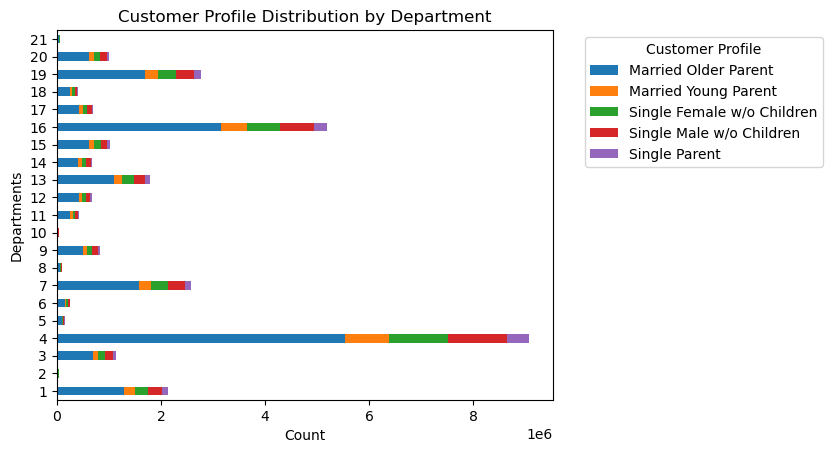

In [43]:
customer_departments_profile_bar = customer_departments_profile.sort_values(by='Married Older Parent', ascending=True)

plt.figure(figsize=(10, 12))  
customer_departments_profile.plot.barh(stacked=True)

plt.title('Customer Profile Distribution by Department')
plt.xlabel('Count')
plt.ylabel('Departments')
plt.legend(title='Customer Profile', bbox_to_anchor=(1.05, 1), loc='upper left')


plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customer_departments_profile_bar.png'))


plt.show()

In [45]:
cross_tab_2 = pd.crosstab(customer_high_activity['customer_profile'], customer_high_activity['spending_flag'])

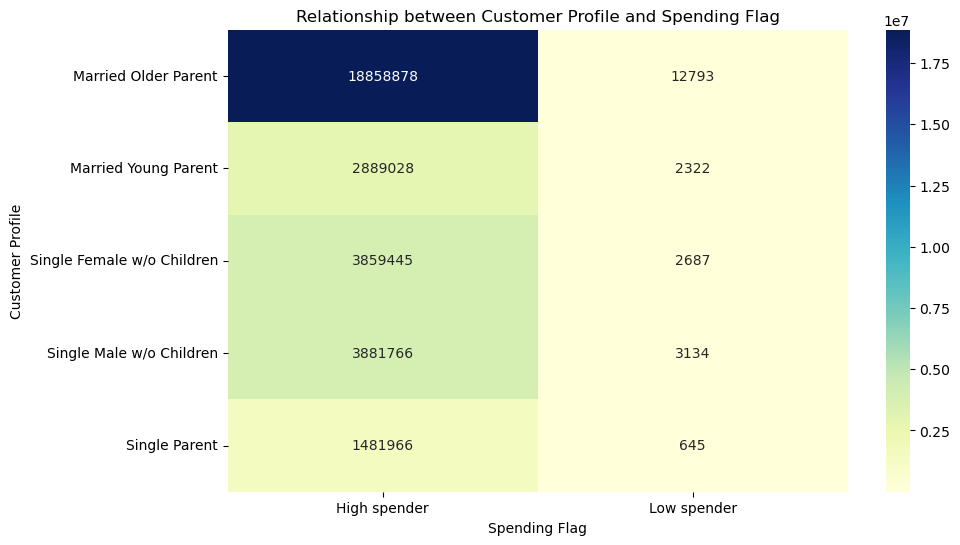

In [46]:
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab_2, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Relationship between Customer Profile and Spending Flag')
plt.xlabel('Spending Flag')
plt.ylabel('Customer Profile')
plt.show()